In [1]:
# importing
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [2]:
# loading images
path_dir = "/content/drive/MyDrive/Dataset/malariya_cell_data_set/cell_images/"

loaded = 0
path = path_dir+"Uninfected/"
uninfected_list = os.listdir(path)

path = path_dir + "Parasitized"
infected_list = os.listdir(path)

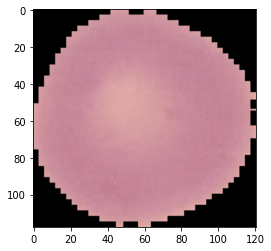

In [3]:
img = plt.imread(path_dir+"Uninfected/"+uninfected_list[0])
plt.imshow(img)

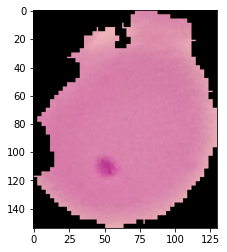

In [4]:
img = plt.imread(path_dir+"Parasitized/"+infected_list[0])
plt.imshow(img)

In [5]:
# Kearas implementation

In [6]:
print("uninfected count:  ",len(os.listdir(path_dir+"/Uninfected")))
print("Parasitized count:  ",len(os.listdir(path_dir+"/Parasitized")))

uninfected count:   13780
Parasitized count:   13789


In [7]:
dataGen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0,validation_split=0.2)

In [8]:
dataset_train = dataGen.flow_from_directory(path_dir,target_size=(128,128),batch_size=32,class_mode="binary",shuffle=True,seed=10,subset="training")
dataset_test = dataGen.flow_from_directory(path_dir,target_size=(128,128),batch_size=32,class_mode="binary",shuffle=True,seed=10,subset="validation")

Found 22055 images belonging to 2 classes.
Found 5512 images belonging to 2 classes.


In [9]:
# printintg the loaded classes
dataset_train

In [10]:
# designing the model
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32,(3,3),padding="same",input_shape=(128,128,3),activation=tf.keras.layers.LeakyReLU()))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding="same"))

model.add(tf.keras.layers.Conv2D(64,(3,3),strides=(1,1),padding="same",input_shape=(128,128,3),activation=tf.keras.layers.LeakyReLU()))
model.add(tf.keras.layers.MaxPool2D(strides=2,padding="same"))

model.add(tf.keras.layers.Conv2D(128,(3,3),strides=(1,1),padding="same",input_shape=(128,128,3),activation=tf.keras.layers.LeakyReLU()))
model.add(tf.keras.layers.MaxPool2D(strides=2,padding="same"))

model.add(tf.keras.layers.Conv2D(256,3,strides=(1,1),padding="same",input_shape=(128,128,3),activation=tf.keras.layers.LeakyReLU()))
model.add(tf.keras.layers.MaxPool2D(strides=2,padding="same"))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation=tf.keras.layers.LeakyReLU()))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(64,activation=tf.keras.layers.LeakyReLU()))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(1,activation='sigmoid'))


In [11]:
# compiling the model
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [12]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 256)       2

In [13]:
# defining early stoping
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=2,verbose=1)

In [14]:
model_history = model.fit(dataset_train,epochs=20,callbacks=early_stop,validation_data=dataset_test)

Epoch 1/20
690/690 [==============================] - 92s 123ms/step - loss: 0.4031 - accuracy: 0.7927 - val_loss: 0.1806 - val_accuracy: 0.9445
Epoch 2/20
690/690 [==============================] - 85s 123ms/step - loss: 0.1460 - accuracy: 0.9566 - val_loss: 0.1883 - val_accuracy: 0.9459
Epoch 3/20
690/690 [==============================] - 84s 122ms/step - loss: 0.1453 - accuracy: 0.9556 - val_loss: 0.1593 - val_accuracy: 0.9452
Epoch 4/20
690/690 [==============================] - 85s 123ms/step - loss: 0.1248 - accuracy: 0.9592 - val_loss: 0.1941 - val_accuracy: 0.9454
Epoch 5/20
690/690 [==============================] - 84s 122ms/step - loss: 0.1063 - accuracy: 0.9647 - val_loss: 0.2351 - val_accuracy: 0.9409
Epoch 00005: early stopping


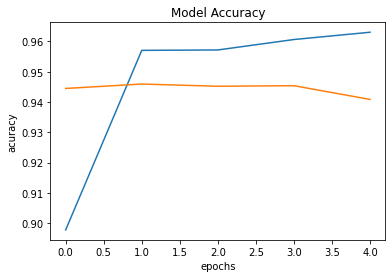

In [15]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel('epochs')
plt.ylabel('acuracy')
plt.show()

In [16]:
model.save("./malariya_classification_acc94.h5")